<a href="https://colab.research.google.com/github/mohitsharmas97/revision/blob/main/DL_day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-churn-dataset


In [ ]:
cd /kaggle/input/customer-churn-dataset

/kaggle/input/customer-churn-dataset


In [ ]:
ls

customer_churn_dataset-testing-master.csv
customer_churn_dataset-training-master.csv


In [ ]:
df = pd.read_csv("customer_churn_dataset-testing-master.csv")
df.head(3)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Subscription Type', 'Contract Length'], drop_first=True)
display(df_encoded.head())

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,1,22,25,14,4,27,598,9,1,False,False,False,True,False
1,2,41,28,28,7,13,584,20,0,False,False,True,True,False
2,3,47,27,10,2,29,757,21,0,True,True,False,False,False
3,4,35,9,12,5,17,232,18,0,True,True,False,False,True
4,5,53,58,24,9,2,533,18,0,False,False,True,False,False


In [ ]:
input_data = df_encoded.drop('Churn', axis=1)
output_data = df_encoded['Churn']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_data = pd.DataFrame(scaler.fit_transform(input_data), columns=input_data.columns)

In [ ]:
input_data.shape

(64374, 13)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(input_data, output_data, test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(51499, 13)

In [ ]:
import tensorflow

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
ann=Sequential()

In [ ]:
ann.add(Dense(10,input_dim=13,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(4,activation='relu'))
ann.add(Dense(1,activation='sigmoid')) #layers bnayi 4

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test), verbose=1)

Epoch 1/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7606 - loss: 0.4611 - val_accuracy: 0.8975 - val_loss: 0.2407
Epoch 2/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9003 - loss: 0.2316 - val_accuracy: 0.9236 - val_loss: 0.1842
Epoch 3/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9259 - loss: 0.1754 - val_accuracy: 0.9397 - val_loss: 0.1426
Epoch 4/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9409 - loss: 0.1381 - val_accuracy: 0.9501 - val_loss: 0.1222
Epoch 5/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9533 - loss: 0.1151 - val_accuracy: 0.9556 - val_loss: 0.1050
Epoch 6/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9586 - loss: 0.1034 - val_accuracy: 0.9602 - val_loss: 0.0967
Epoch 7/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9620 - loss: 0.0960 - val_accuracy: 0.9632 - val_loss: 0.0911
Epoch 8/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9650 - loss: 0.0892 - 

In [ ]:
ann.history.history

{'accuracy': [0.8397250175476074,
  0.9080370664596558,
  0.9304258227348328,
  0.9448727369308472,
  0.9536495804786682,
  0.9587953090667725,
  0.9629507660865784,
  0.9661158323287964,
  0.9680187702178955,
  0.9701159000396729],
 'loss': [0.34532228112220764,
  0.2147999256849289,
  0.16399236023426056,
  0.13235095143318176,
  0.11363530158996582,
  0.10236521065235138,
  0.09422189742326736,
  0.08647823333740234,
  0.08163832873106003,
  0.07748514413833618],
 'val_accuracy': [0.8974757194519043,
  0.923572838306427,
  0.9396504759788513,
  0.9501359462738037,
  0.9555728435516357,
  0.9601553678512573,
  0.9631844758987427,
  0.9668349623680115,
  0.968699038028717,
  0.9705631136894226],
 'val_loss': [0.24069125950336456,
  0.18422947824001312,
  0.14261479675769806,
  0.12223285436630249,
  0.10503952950239182,
  0.09666985273361206,
  0.09107251465320587,
  0.08287074416875839,
  0.08047068119049072,
  0.07428975403308868]}

In [ ]:
train_accuracy=ann.history.history['accuracy']
test_accuracy=ann.history.history['val_accuracy']

In [ ]:
len(test_accuracy)

10

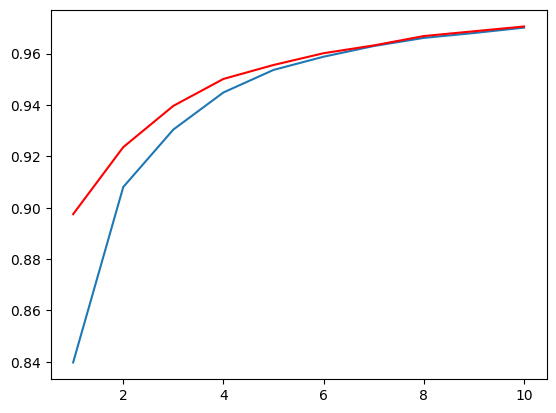

In [ ]:
plt.plot([i for i in range(1,11)], train_accuracy)
plt.plot([i for i in range(1,11)], test_accuracy, c='red')
plt.show()

In [ ]:
 loss, accuracy = ann.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.0682
Test Loss: 0.0743
Test Accuracy: 0.9706


In [ ]:
prd=ann.predict(x_test)

403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
prd_data=[]
for i in prd:
    if i>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,prd_data)

0.9705631067961165

In [ ]:
prd1=ann.predict(x_train)
prd_data1=[]
for i in prd1:
    if i>0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

1610/1610 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
accuracy_score(y_train,prd_data1)

0.9717470242140624

Now that the training history is plotted, let's evaluate the model's performance on the test set using additional metrics.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
loss, accuracy =ann.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Get predictions for the test set
y_pred = ann.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

Test Loss: 0.0743
Test Accuracy: 0.9706
403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6793
           1       0.97      0.97      0.97      6082

    accuracy                           0.97     12875
   macro avg       0.97      0.97      0.97     12875
weighted avg       0.97      0.97      0.97     12875


Confusion Matrix:
[[6602  191]
 [ 188 5894]]
